# MNIST CNN in Keras

Followed from [this tutorial](https://keras.io/examples/vision/mnist_convnet/).

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [61]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [62]:
# Model

model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        
        layers.Conv2D(filters=10, kernel_size=5, activation='relu'),
        layers.MaxPooling2D(pool_size=2),

        layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
        layers.MaxPooling2D(pool_size=2),

        layers.Dropout(rate=0.5),

        layers.Flatten(),

        layers.Dense(50, activation='relu'),

        layers.Dense(10, activation='softmax')
    ]
)

# Compile
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)
"""
model.compile(
    optimizer = tf.keras.optimizers.SGD(
        learning_rate = 0.01,
        momentum = 0.5
    ),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)
"""

# Summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 4, 4, 20)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 4, 4, 20)          0         
                                                                 
 flatten_18 (Flatten)        (None, 320)             

In [63]:
x_train.shape

(60000, 28, 28, 1)

In [64]:
y_train.shape

(60000,)

## Train the model

In [65]:
history = model.fit(x_train, y_train, batch_size=64, epochs=6)

Epoch 1/6
938/938 [==============================] - 11s 11ms/step - loss: 0.9122 - sparse_categorical_accuracy: 0.6994
Epoch 2/6
938/938 [==============================] - 10s 10ms/step - loss: 0.2689 - sparse_categorical_accuracy: 0.9183
Epoch 3/6
938/938 [==============================] - 10s 10ms/step - loss: 0.2040 - sparse_categorical_accuracy: 0.9386
Epoch 4/6
938/938 [==============================] - 10s 10ms/step - loss: 0.1720 - sparse_categorical_accuracy: 0.9477
Epoch 5/6
938/938 [==============================] - 10s 10ms/step - loss: 0.1548 - sparse_categorical_accuracy: 0.9528
Epoch 6/6
938/938 [==============================] - 10s 10ms/step - loss: 0.1406 - sparse_categorical_accuracy: 0.9574


## Evaluate the trained model

In [66]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06282080709934235
Test accuracy: 0.9810000061988831


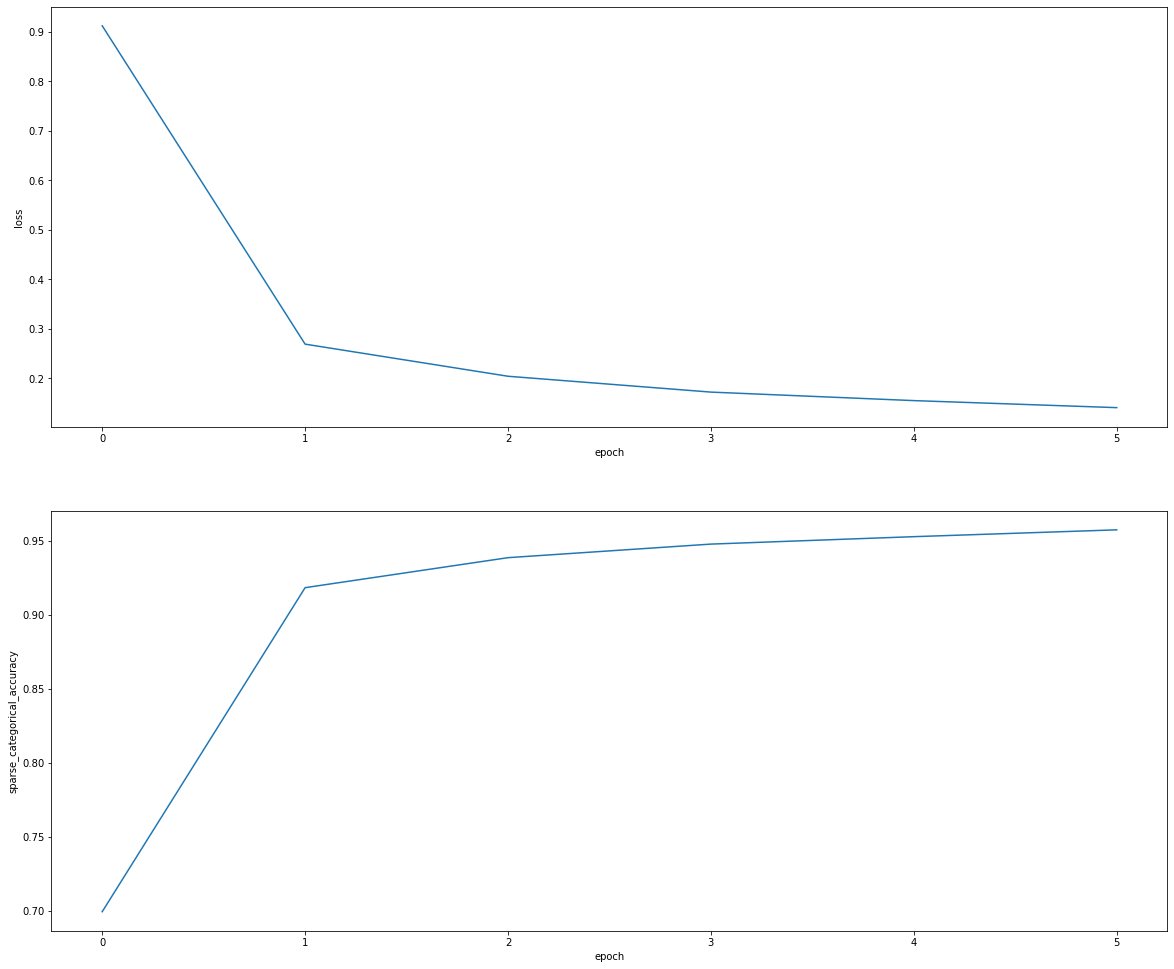

In [70]:
# This will plot what was printed to the console during the training.
plt.figure(figsize=(20, 17))
for i in range(2):
    idx = list(history.history.keys())[i]
    plt.subplot(2, 1, i+1)
    plt.ylabel(idx)
    plt.xlabel('epoch')
    plt.plot(history.history[idx])
plt.show()